<a href="https://colab.research.google.com/github/gusdoc/Tour-de-France-/blob/main/Tour_de_France.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de los ciclistas y equipos que terminaron o ganaron el Tour de France entre 2010-2022




**Tour de France**





***Contexto:*** El Tour de Francia es una prestigiosa carrera ciclista anual de varias etapas que se celebra principalmente en Francia. Es una de las pruebas ciclistas más famosas y exigentes del mundo. La carrera suele durar tres semanas y recorre unos 3.500 kilómetros (2.200 millas) de terreno variado, incluyendo montañas, etapas llanas y contrarrelojes.

El Tour de Francia se organizó por primera vez en 1903 y se ha celebrado anualmente, excepto durante las dos Guerras Mundiales. Atrae a los mejores ciclistas profesionales de todo el mundo, que compiten en equipos que representan a sus respectivos países o a equipos comerciales.

La carrera se divide en etapas, que pueden ser contrarrelojes individuales o etapas de salida masiva. El ganador final se determina en función del tiempo acumulado en completar todas las etapas.

El Tour de Francia no es sólo una prueba de resistencia y habilidad individual, sino también una exhibición de táctica y estrategia de equipo. Se ha convertido en un acontecimiento deportivo de primer orden, con millones de espectadores en las carreteras y otros tantos en las televisiones de todo el mundo.


***Interes de la investigación:*** El objetivo principal de este proyecto de data science es analizar los ciclistas que terminaron la carrera y aquellos que la ganaron para identificar alguna tendencia en el desempenio de los competidores entre los anios 2010 y 2022. De igual manera un analisis general de la informacion sera valioso para identificar tendencias y en un segundo proyecto ahondar mas en ellas.

Las columnas en esta base de datos son las siguientes :

* Year: Anio del tour de France.

* Rank: Posicion al final de la carrera.

* Rider: Nombre del ciclista.

* Time: Tiempo en el que el ciclista termino la carrera presentado como la diferencia con el que la gano.

* Team: Equipo al que el ciclista pertenece.

* Year.1: Anio del tour de france.

* Country: Pais de origen del ciclista.

* Rider.1: Nombre del ciclista que gano la carrera.

* Team.1: Equipo al que pertenece el ciclista que gano la carrera

* Time.1: Tiempo en el que el ciclista que gano la carrera, termino la carrera.

* Margin: Diferencia de tiempo con el ciclista que gano la carrera.

* Stages_Won: Etapas ganadas.

* Stages_Led: Etapas lideradas.

* Avg_Speed: Velocidad promedio.

* Height: Altura.

* Weight: Peso.

* Born: Fecha de nacimiento.

* Died: Fecha de muerte.


Esta base de datos representa una muestra de la base de datos original. De 4 tablas descargadas de Mavenanalytics (tour de Farnce), luego de la creacion del diagrama de relaciones en SQL , la union de dos tablas (full outer join) fue realizada. Esta query fue extraida y caragada en python , con pandas.



***Fuente del data set:*** www.mavenanalytics.io

# Exploracion del dataset

**Importacion de las librerias**

In [ ]:
import pandas as pd

In [ ]:
import sklearn as sk

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import missingno as msno

In [ ]:
#Traigo la query de SQL en csv

# Ruta del archivo de Drive con el CSV
archivo_drive = '/content/drive/MyDrive/TP data science/query from SQL'



In [ ]:
sql_query = pd.read_csv('/content/drive/MyDrive/TP data science/query from SQL/query sql 2.csv')

In [ ]:
sql_query.head(3)

,Year,Rank,Rider,Time,Team,Year.1,Country,Rider.1,Team.1,Time.1,Margin,Stages_Won,Stages_Led,Avg_Speed,Height,Weight,Born,Died
0,2010,NaN,Alberto Contador (ESP),"91h 58' 48""",Team Astana,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN
1,2010,1.0,Andy Schleck (LUX),"91h 59' 27""",Team Saxo Bank,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN
2,2010,NaN,Denis Menchov (RUS),"+1' 22""",Rabobank,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN


**Ver como esta estructurado el Data Set**

In [ ]:
sql_query.shape

(1617, 18)

**Ver tipos de datos**

In [ ]:
sql_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617 entries, 1 to 1624
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1617 non-null   int64  
 1   Rank        1617 non-null   float64
 2   Rider       1617 non-null   object 
 3   Time        1616 non-null   object 
 4   Team        1616 non-null   object 
 5   Year.1      1617 non-null   int64  
 6   Country     1617 non-null   object 
 7   Rider.1     1617 non-null   object 
 8   Team.1      1617 non-null   object 
 9   Time.1      1617 non-null   object 
 10  Margin      1617 non-null   object 
 11  Stages_Won  1617 non-null   int64  
 12  Stages_Led  1617 non-null   float64
 13  Avg_Speed   1617 non-null   object 
 14  Height      1617 non-null   object 
 15  Weight      1617 non-null   object 
 16  Born        1617 non-null   object 
 17  Died        0 non-null      float64
dtypes: float64(3), int64(3), object(12)
memory usage: 240.0+ KB


Aqui veo que las columnas Rank y Stages tienen datos faltantes

In [ ]:
sql_query.dtypes

Year            int64
Rank          float64
Rider          object
Time           object
Team           object
Year.1          int64
Country        object
Rider.1        object
Team.1         object
Time.1         object
Margin         object
Stages_Won      int64
Stages_Led    float64
Avg_Speed      object
Height         object
Weight         object
Born           object
Died          float64
dtype: object

Aqui veo que las columnas time, time.1, Avg_Speed, Height, Weight son objects. Debere transformarlas a int para realizar estadistica sobre datos cuanttativos si asi quisiera.

Chequeo de duplicados

In [ ]:
sql_query.duplicated()

1       False
3       False
4       False
5       False
6       False
        ...  
1620    False
1621    False
1622    False
1623    False
1624    False
Length: 1617, dtype: bool

In [ ]:
sql_query.duplicated().sum()

0

No tengo lineas duplicadas

In [ ]:
sql_query.drop_duplicates()

,Year,Rank,Rider,Time,Team,Year.1,Country,Rider.1,Team.1,Time.1,Margin,Stages_Won,Stages_Led,Avg_Speed,Height,Weight,Born,Died
1,2010,1.0,Andy Schleck (LUX),"91h 59' 27""",Team Saxo Bank,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN
3,2010,2.0,Samuel Sánchez (ESP),"+ 3' 01""",Euskaltel–Euskadi,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN
4,2010,3.0,Jurgen Van den Broeck (BEL),"+ 6' 15""",Omega Pharma–Lotto,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN
5,2010,4.0,Robert Gesink (NED),"+ 8' 52""",Rabobank,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN
6,2010,5.0,Ryder Hesjedal (CAN),"+ 9' 36""",Garmin–Transitions,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86m,68kg,1985-06-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2019,151.0,Alex Dowsett (GBR),"+ 4h 14' 39""",Team Katusha–Alpecin,2019,Colombia,Egan Bernal,Team Ineos,"82h 57' 00""","+ 1' 11""",0,2.0,40.6km/h,1.75m,60kg,1997-01-13,NaN
1621,2019,152.0,Michael Mørkøv (DEN),"+ 4h 19' 33""",Deceuninck–Quick-Step,2019,Colombia,Egan Bernal,Team Ineos,"82h 57' 00""","+ 1' 11""",0,2.0,40.6km/h,1.75m,60kg,1997-01-13,NaN
1622,2019,153.0,Jens Debusschere (BEL),"+ 4h 29' 07""",Team Katusha–Alpecin,2019,Colombia,Egan Bernal,Team Ineos,"82h 57' 00""","+ 1' 11""",0,2.0,40.6km/h,1.75m,60kg,1997-01-13,NaN
1623,2019,154.0,Yoann Offredo (FRA),"+ 4h 31' 43""",Wanty–Gobert,2019,Colombia,Egan Bernal,Team Ineos,"82h 57' 00""","+ 1' 11""",0,2.0,40.6km/h,1.75m,60kg,1997-01-13,NaN


la cantidad de lineas sigue siendo la misma (2047) por lo que en efecto, no habia duplicados.

In [ ]:
finishers_per_year = sql_query.groupby('Year')['Rider'].count()
finishers_per_year

Year
2010    165
2011    166
2012    152
2013    169
2014    164
2015    160
2016    174
2017    167
2018    145
2019    155
Name: Rider, dtype: int64

## Limpieza de datos

 pasare el peso a int para luego poder hacer metricas





In [ ]:
sql_query['Weight'] = sql_query['Weight'].str.replace('kg', '')

In [ ]:
sql_query ['Weight'] = sql_query['Weight'].astype(int)

pasare la altura (Height) a float para poder hacer metricas.

In [ ]:
sql_query['Height'] = sql_query['Height'].str.replace('m', '')

In [ ]:
sql_query ['Height'] = sql_query['Height'].astype(float)

Intento pasar los datos de la columna Time a un formato que me permita calcular la media

In [ ]:

import re

# Convert the 'Time' column to string type
sql_query['Time'] = sql_query['Time'].astype(str)

# Extract hours, minutes, and seconds using regular expressions
time_components = sql_query['Time'].str.extract(r"(\+|-)?(\d+)h (\d+)' (\d+)\"")

# Convert extracted components to numeric values
sign = time_components[0].fillna('')
hours = pd.to_numeric(time_components[1].fillna(0), errors='coerce')
minutes = pd.to_numeric(time_components[2].fillna(0), errors='coerce')
seconds = pd.to_numeric(time_components[3].fillna(0), errors='coerce')

# Create a new timedelta column based on the extracted components
time_timedelta = pd.to_timedelta(hours, unit='h') + pd.to_timedelta(minutes, unit='m') + pd.to_timedelta(seconds, unit='s')

# Apply the sign to adjust the time values
time_timedelta *= time_timedelta.dt.total_seconds().apply(lambda x: -1 if x < 0 else 1) * (sign.apply(lambda x: -1 if x == '-' else 1))

# Calculate the mean time in minutes
mean_time_minutes = time_timedelta.mean().total_seconds() / 60

print(mean_time_minutes)













180.374933


la media de la columna Time es de 190,64 minutos. Esto es el tiempo extra promedio de arrivo luego del ciclista que termino la carrera primero

In [ ]:
sql_query['Time']

1        91h 59' 27"
3           + 3' 01"
4           + 6' 15"
5           + 8' 52"
6           + 9' 36"
            ...     
1620    + 4h 14' 39"
1621    + 4h 19' 33"
1622    + 4h 29' 07"
1623    + 4h 31' 43"
1624    + 4h 34' 23"
Name: Time, Length: 1617, dtype: object

**Eliminar columnas repetidas y que no sirven:**

In [ ]:
sql_query.head(2)

,Year,Rank,Rider,Time,Team,Year.1,Country,Rider.1,Team.1,Time.1,Margin,Stages_Won,Stages_Led,Avg_Speed,Height,Weight,Born,Died
1,2010,1.0,Andy Schleck (LUX),"91h 59' 27""",Team Saxo Bank,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,NaN
3,2010,2.0,Samuel Sánchez (ESP),"+ 3' 01""",Euskaltel–Euskadi,2010,Luxembourg,Andy Schleck,Team Saxo Bank,"91h 59' 27""","+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,NaN


In [ ]:
sql_query['Team'].unique()

array(['Team Saxo Bank', 'Euskaltel–Euskadi', 'Omega Pharma–Lotto',
       'Rabobank', 'Garmin–Transitions', 'Team Katusha', 'Liquigas–Doimo',
       'Team RadioShack', "Caisse d'Epargne", 'Ag2r–La Mondiale',
       'Astana', 'Team Sky', 'Quick-Step', 'Cervélo TestTeam', 'FDJ',
       'BMC Racing Team', 'Cofidis', 'Lampre–Farnese',
       'Team HTC–Columbia', 'Bbox Bouygues Telecom',
       'Footon–Servetto–Fuji', 'Team Milram', 'Leopard Trek',
       'Team Europcar', 'Lampre–ISD', 'Liquigas–Cannondale',
       'Garmin–Cervélo', 'Saur–Sojasun', 'HTC–Highroad',
       'Vacansoleil–DCM', nan, 'Movistar Team', 'Saxo Bank–SunGard',
       'Lotto–Belisol', 'RadioShack–Nissan', 'FDJ–BigMat',
       'Saxo Bank–Tinkoff Bank', 'Omega Pharma–Quick-Step',
       'Garmin–Sharp', 'Orica–GreenEDGE', 'Argos–Shimano', 'Saxo–Tinkoff',
       'Belkin Pro Cycling', 'RadioShack–Leopard', 'Lampre–Merida',
       'FDJ.fr', 'Sojasun', 'Cannondale', 'NetApp–Endura',
       'Trek Factory Racing', 'Bretagne–Séc

In [ ]:
sql_query['Team'].nunique()

89

In [ ]:
sql_query ['Team'].value_counts()

Cofidis                 75
Astana                  72
Team Sky                70
BMC Racing Team         70
Movistar Team           67
                        ..
RadioShack–Nissan        6
Team Jumbo–Visma         6
Garmin–Transitions       6
CCC Team                 6
Footon–Servetto–Fuji     5
Name: Team, Length: 89, dtype: int64

In [ ]:
sql_query=sql_query.rename(columns={'Rider.1': 'Winner'}) ##esta columna es el ganador de la tabla de winners

In [ ]:
sql_query=sql_query.rename(columns={'Rider': 'Finishers'}) ##esta columna son los que terminaron la carrera de la tabla de Finishers

In [ ]:
sql_query=sql_query.drop(columns={'Time.1'}) ##esta columna hace referencia al tiempo de carrera del ganador. Esta informacion ya la tengo el la columna Time, por lo que no la necesito en una columna separada.

In [ ]:
sql_query=sql_query.rename(columns={'Team.1': 'Equipo del ganador'}) ##esta columna es el equipo al que pertence el ganador de la carrera

In [ ]:
sql_query = sql_query.drop(['Year.1'], axis=1) ## esta columna continene el anio en el que el ciclista gano la carrera. este dato ya esta presente en la columna Year.


In [ ]:
sql_query.head(2)

,Year,Rank,Finishers,Time,Team,Country,Winner,Equipo del ganador,Margin,Stages_Won,Stages_Led,Avg_Speed,Height,Weight,Born,Died
1,2010,1.0,Andy Schleck (LUX),"91h 59' 27""",Team Saxo Bank,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,NaN
3,2010,2.0,Samuel Sánchez (ESP),"+ 3' 01""",Euskaltel–Euskadi,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,NaN


In [ ]:
sql_query.isnull().sum()

Year                     0
Rank                     0
Finishers                0
Time                     0
Team                     1
Country                  0
Winner                   0
Equipo del ganador       0
Margin                   0
Stages_Won               0
Stages_Led               0
Avg_Speed                0
Height                   0
Weight                   0
Born                     0
Died                  1617
dtype: int64

La columna Died son todos valores null ya que los ciclistas estan vivos
en el anio 2022. Para el objetivo de este trabajo voy a reemplazar los null de la columna Died , con el anio 2022, ya que es hasta este anio que hacemos el analisis. De esta manera podre luego calcular las edades de los ciclistas (2022- Born)


La columna Stages tiene una cantidad significativa de Null y debo pensar que hacer al respecto. La columna Rank tiene solo 9 NUll por lo que el poprcentaje es bajo. La columna Team tiene una fila NUll.  


<Axes: >

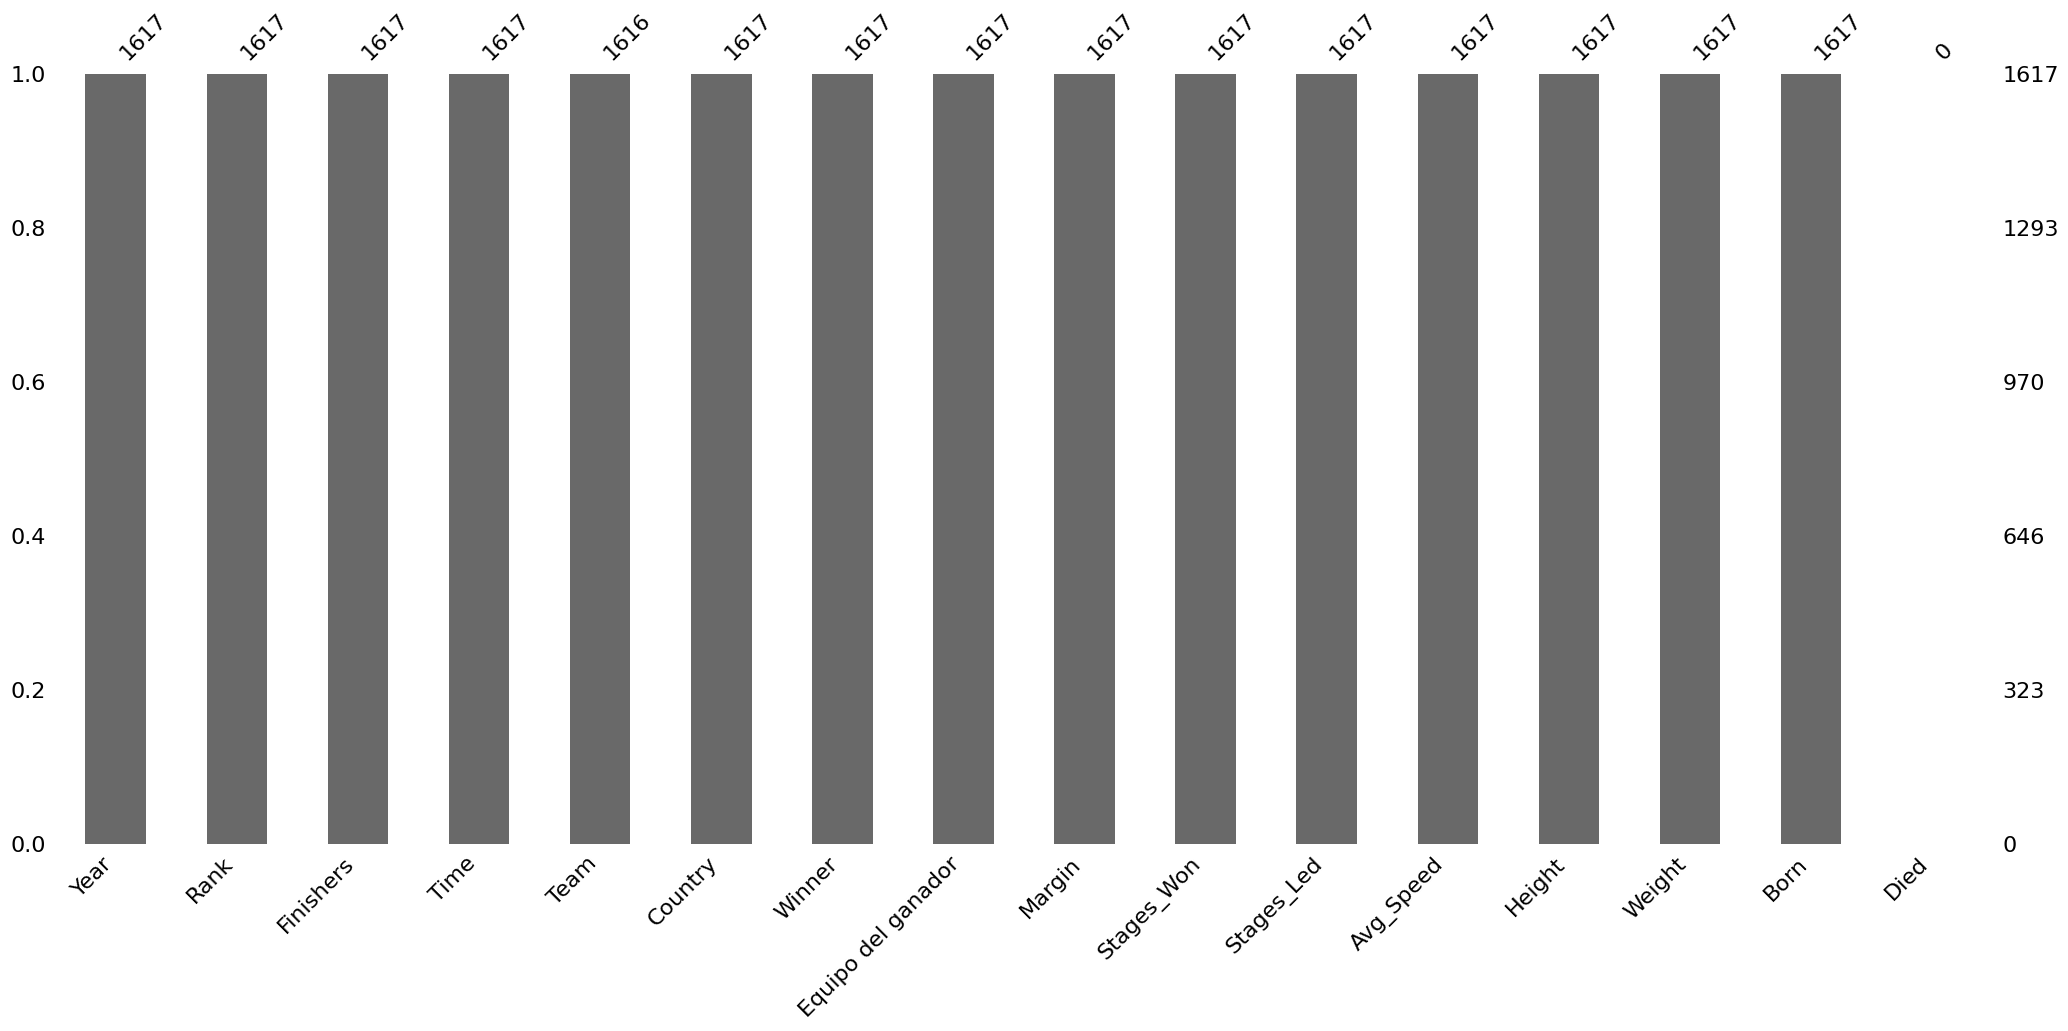

In [ ]:
msno.bar(sql_query)

In [ ]:
sql_query['Died'] = sql_query['Died'].fillna(2022)  ## reemplazo los null de la columna Died con el anio 2022 ya que los ciclistas estan vivos.

In [ ]:
sql_query.isnull().sum()

Year                  0
Rank                  0
Finishers             0
Time                  0
Team                  1
Country               0
Winner                0
Equipo del ganador    0
Margin                0
Stages_Won            0
Stages_Led            0
Avg_Speed             0
Height                0
Weight                0
Born                  0
Died                  0
dtype: int64

ahora me ocupare de los valores nulos en la columna Stages_led

In [ ]:
# Ver los valores nulos de la columna 'Stages_Led'
nulos = sql_query['Stages_Led'].isnull()

# Calcular el porcentaje de valores nulos en la columna 'category'
porcentaje_nulos = nulos.mean() * 100

In [ ]:
porcentaje_nulos # por alguna razon ahora me da 0 cuando antes era de 20 %. Creo que es porque en la parte de modeling, hice un drop de valores nulos con un inplace verdadero.

0.0

Este es un porcentaje alto de valores faltantes (20.6%) y debo analizar que hacer con ellos. Aun no estoy seguro si necesito esta columna para mi analisis.

In [ ]:
# Calculate the mode of the 'Stages_Led' column
mode_value = sql_query['Stages_Led'].mode().iloc[0]

# Reemplazo los missing values con la moda
sql_query['Stages_Led'] = sql_query['Stages_Led'].fillna(mode_value)

In [ ]:
sql_query.isnull().sum()

Year                  0
Rank                  9
Finishers             0
Time                  0
Team                  0
Country               0
Winner                0
Equipo del ganador    0
Margin                0
Stages_Won            0
Stages_Led            0
Avg_Speed             0
Height                0
Weight                0
Born                  0
Died                  0
dtype: int64

Veo que la columna Team tiene un faltante. Entonces lo reemplazo con la moda.

In [ ]:
# Calculo la moda de la columna 'Team'
mode_value = sql_query['Team'].mode().iloc[0]

# Reemplazo el missing value con la moda
sql_query['Team'] = sql_query['Team'].fillna(mode_value)

In [ ]:
sql_query.isnull().sum()

Year                  0
Rank                  9
Finishers             0
Time                  0
Team                  0
Country               0
Winner                0
Equipo del ganador    0
Margin                0
Stages_Won            0
Stages_Led            0
Avg_Speed             0
Height                0
Weight                0
Born                  0
Died                  0
dtype: int64

Aqui estimare el porcentaje de valores nulos en la columna Rank

In [ ]:
nulos_en_rank= sql_query['Rank'].isnull()
nulos_en_rank

1       False
3       False
4       False
5       False
6       False
        ...  
1620    False
1621    False
1622    False
1623    False
1624    False
Name: Rank, Length: 1617, dtype: bool

In [ ]:
porcentaje_nulos_en_rank = nulos_en_rank.mean() * 100
porcentaje_nulos_en_rank

0.0

In [ ]:
nulos_en_rank.value_counts() # tenia 9 valores nulos, pero con el drop nulls de la parte de modelado que he hecho, ahora los valores nulos desaparecieron.

False    1617
Name: Rank, dtype: int64

Tengo 9 valores nulos en la categoria Rank. Esto representa el 0.43 % de los datos, por lo que puedo eliminarlos. Esta categoria es importante ya que me piden evaluar a los top 5 ciclistas. De modo que de esta columna solo quiero obtener aquellos finishers que estan en el top 5.

## Visualización de datos

In [ ]:
sql_query.head (2)

,Year,Rank,Finishers,Time,Team,Country,Winner,Equipo del ganador,Margin,Stages_Won,Stages_Led,Avg_Speed,Height,Weight,Born,Died
1,2010,1.0,Andy Schleck (LUX),"91h 59' 27""",Team Saxo Bank,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,2022.0
3,2010,2.0,Samuel Sánchez (ESP),"+ 3' 01""",Euskaltel–Euskadi,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,2022.0


In [ ]:
sql_query.dropna(subset = 'Rank')

,Year,Rank,Finishers,Time,Team,Country,Winner,Equipo del ganador,Margin,Stages_Won,Stages_Led,Avg_Speed,Height,Weight,Born,Died
1,2010,1.0,Andy Schleck (LUX),"91h 59' 27""",Team Saxo Bank,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,2022.0
3,2010,2.0,Samuel Sánchez (ESP),"+ 3' 01""",Euskaltel–Euskadi,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,2022.0
4,2010,3.0,Jurgen Van den Broeck (BEL),"+ 6' 15""",Omega Pharma–Lotto,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,2022.0
5,2010,4.0,Robert Gesink (NED),"+ 8' 52""",Rabobank,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,2022.0
6,2010,5.0,Ryder Hesjedal (CAN),"+ 9' 36""",Garmin–Transitions,Luxembourg,Andy Schleck,Team Saxo Bank,"+ 1' 22""",2,12.0,39.6km/h,1.86,68,1985-06-10,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2019,151.0,Alex Dowsett (GBR),"+ 4h 14' 39""",Team Katusha–Alpecin,Colombia,Egan Bernal,Team Ineos,"+ 1' 11""",0,2.0,40.6km/h,1.75,60,1997-01-13,2022.0
1621,2019,152.0,Michael Mørkøv (DEN),"+ 4h 19' 33""",Deceuninck–Quick-Step,Colombia,Egan Bernal,Team Ineos,"+ 1' 11""",0,2.0,40.6km/h,1.75,60,1997-01-13,2022.0
1622,2019,153.0,Jens Debusschere (BEL),"+ 4h 29' 07""",Team Katusha–Alpecin,Colombia,Egan Bernal,Team Ineos,"+ 1' 11""",0,2.0,40.6km/h,1.75,60,1997-01-13,2022.0
1623,2019,154.0,Yoann Offredo (FRA),"+ 4h 31' 43""",Wanty–Gobert,Colombia,Egan Bernal,Team Ineos,"+ 1' 11""",0,2.0,40.6km/h,1.75,60,1997-01-13,2022.0


# Metricas

**Estadistica descriptiva de la variable "Weight" de los ciclistas que ganaron el Tour de France **

In [ ]:
column_stats = {
    'Mean': sql_query['Weight'].mean(),
    'Median': sql_query['Weight'].median(),
    'Minimum': sql_query['Weight'].min(),
    'Maximum': sql_query['Weight'].max(),
    'Standard Deviation': sql_query['Weight'].std(),
    'Variance': sql_query['Weight'].var()
}

column_stats

{'Mean': 67.29560915275201,
 'Median': 69.0,
 'Minimum': 60,
 'Maximum': 71,
 'Standard Deviation': 3.0846853853110887,
 'Variance': 9.51528392635182}

Hemos inferido que esta es una muestra de distribucion normal. Vemos que la Media y la mMdiana estan bastante cerca, por lo que inferimos que no hay outliers que esten sesgando los resultados. La diferencia entre el valor minimo y el maximo es de 10. La varianza es de 10, por lo que vemos que puede haber una diferencia importante entre el ciclista mas liviano y el mas pesado de la muestra.

El mismo calculo pero con el metodo desccribe en la columna "Weight"

In [ ]:
sql_query['Weight'].describe()

count    1617.000000
mean       67.295609
std         3.084685
min        60.000000
25%        65.000000
50%        69.000000
75%        69.000000
max        71.000000
Name: Weight, dtype: float64

Metricas sobre la altura de los ciclistas ganadores. (Height)

In [ ]:
column_stats_height = {
    'Mean': sql_query['Height'].mean(),
    'Median': sql_query['Height'].median(),
    'Minimum': sql_query['Height'].min(),
    'Maximum': sql_query['Height'].max(),
    'Standard Deviation': sql_query['Height'].std(),
    'Variance': sql_query['Height'].var()
}

column_stats_height

{'Mean': 1.832121212121212,
 'Median': 1.86,
 'Minimum': 1.74,
 'Maximum': 1.9,
 'Standard Deviation': 0.04958506194245183,
 'Variance': 0.002458678367836785}

In [ ]:
sql_query['Height'].describe()

count    1617.000000
mean        1.832121
std         0.049585
min         1.740000
25%         1.800000
50%         1.860000
75%         1.860000
max         1.900000
Name: Height, dtype: float64

Vemos que los ciclistas que han ganado el Tour de France tienen una altura que se centra alrededor de 1.82m. La media es de 1.818m, y la mediana de 1.83m. La variance es pequenia (0.0027)

Debido a que la media y la mediana son similares, no se detectan outliers.

**Average time to complete de race **

In [ ]:
import re

# Convert the 'Time' column to string type
sql_query['Time'] = sql_query['Time'].astype(str)

# Extract hours, minutes, and seconds using regular expressions
time_components = sql_query['Time'].str.extract(r"(\+|-)?(\d+)h (\d+)' (\d+)\"")

# Convert extracted components to numeric values
sign = time_components[0].fillna('')
hours = pd.to_numeric(time_components[1].fillna(0), errors='coerce')
minutes = pd.to_numeric(time_components[2].fillna(0), errors='coerce')
seconds = pd.to_numeric(time_components[3].fillna(0), errors='coerce')

# Create a new timedelta column based on the extracted components
time_timedelta = pd.to_timedelta(hours, unit='h') + pd.to_timedelta(minutes, unit='m') + pd.to_timedelta(seconds, unit='s')

# Apply the sign to adjust the time values
time_timedelta *= time_timedelta.dt.total_seconds().apply(lambda x: -1 if x < 0 else 1) * (sign.apply(lambda x: -1 if x == '-' else 1))

# Calculate the mean time in minutes
mean_time_minutes = time_timedelta.mean().total_seconds() / 60

print(mean_time_minutes)

180.374933


El tiempo promedio de todos los ciclistas no ganadores en el dataset para completar el tour de france . es de 190.64 minutos luego del ganador.

## Visualización de datos

In [ ]:
# Importacion de matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Gráfico de barras: Distribución de carreras ganadas por ciclista
Tipos_counts = sql_query['Winner'].value_counts()
Tipos_counts

Chris Froome       670
Cadel Evans        166
Andy Schleck       165
Vincenzo Nibali    164
Egan Bernal        155
Bradley Wiggins    152
Geraint Thomas     145
Name: Winner, dtype: int64

In [ ]:
top_10_ciclista = Tipos_counts.head(10)
top_10_ciclista

Chris Froome       670
Cadel Evans        166
Andy Schleck       165
Vincenzo Nibali    164
Egan Bernal        155
Bradley Wiggins    152
Geraint Thomas     145
Name: Winner, dtype: int64

Grafico

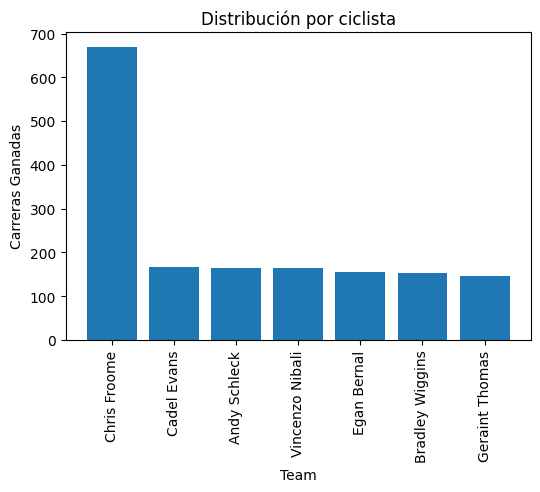

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(top_10_ciclista.index, top_10_ciclista.values)
plt.xlabel('Team')
plt.ylabel('Carreras Ganadas')
plt.title('Distribución por ciclista')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Gráfico de barras: Distribución de categorías de equipos
Tipos_counts_team = sql_query['Team'].value_counts()
top_10 = Tipos_counts_team.head(10)
top_10

Cofidis             76
Astana              72
Team Sky            70
BMC Racing Team     70
Movistar Team       67
Team Katusha        47
Team Europcar       42
Ag2r–La Mondiale    40
AG2R La Mondiale    38
Lotto–Soudal        34
Name: Team, dtype: int64

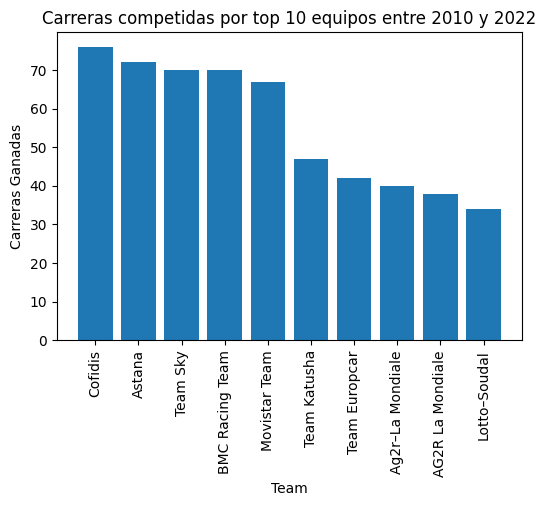

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(top_10.index, top_10.values)
plt.xlabel('Team')
plt.ylabel('Carreras Ganadas')
plt.title('Carreras competidas por top 10 equipos entre 2010 y 2022')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Gráfico de barras: Distribución de top 10 ciclistas que terminaron las carreras
Tipos_counts_finishers = sql_query['Finishers'].value_counts()
top_10_finishers = Tipos_counts_finishers.head(10)
top_10_finishers

Marcus Burghardt (GER)        9
Pierre Rolland (FRA)          9
Amaël Moinard (FRA)           9
Imanol Erviti (ESP)           9
Sylvain Chavanel (FRA)        8
Thomas Voeckler (FRA)         8
André Greipel (GER)           8
Lars Bak (DEN)                8
Edvald Boasson Hagen (NOR)    8
Geraint Thomas (GBR)          8
Name: Finishers, dtype: int64

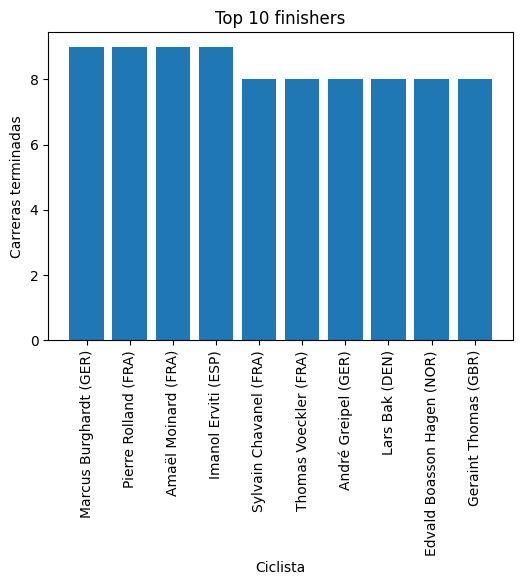

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(top_10_finishers.index, top_10_finishers.values)
plt.xlabel('Ciclista')
plt.ylabel('Carreras terminadas')
plt.title('Top 10 finishers')
plt.xticks(rotation=90)
plt.show()

Grafico boxplot para ver la distribucion de peso de los ciclistas ganadores

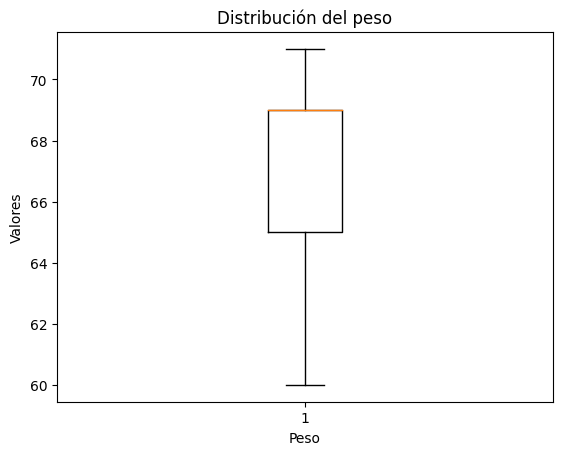

In [ ]:
plt.boxplot(sql_query['Weight'])
plt.xlabel('Peso')
plt.ylabel('Valores')
plt.title('Distribución del peso')
plt.show()

Este grafico nos muestra que hay un poco mas de 10 kg entre el ciclista mas liviano y el mas pesado del dataset. La mediana es de 68 kilos, por lo que el 50% de los ciclistas se encuentra por debajo y por encima de este valor. El 25% de la muestra se encuentra debajo de los 65 kilos. El 50% de la muestra se encuentra entre los 65 y 69 Kilos. Finalmente el 25 % de la muestra se encuentra entre 69 y 71 kilos. No parece haber outliers lo cual corresponde a una muestra de deportistas de alto nivel.

Evolucion del numero de finalizadores del Tour de france en el tiempo

In [ ]:
finishers_per_year = sql_query.groupby('Year')['Finishers'].count()
finishers_per_year

Year
2010    165
2011    166
2012    152
2013    169
2014    164
2015    160
2016    174
2017    167
2018    145
2019    155
Name: Finishers, dtype: int64

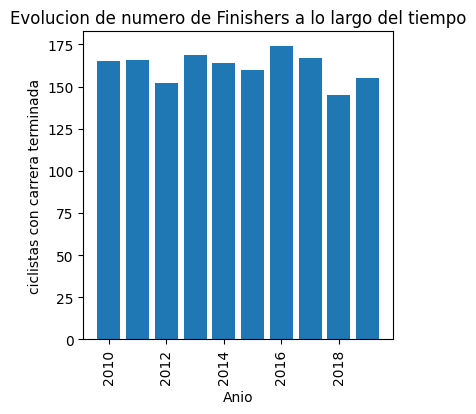

In [ ]:
plt.figure(figsize=(4, 4))
plt.bar(finishers_per_year.index, finishers_per_year.values)
plt.xlabel('Anio')
plt.ylabel('ciclistas con carrera terminada')
plt.title('Evolucion de numero de Finishers a lo largo del tiempo')
plt.xticks(rotation=90)
plt.show()

# Modelado, evaluación y optimización

Modelo de regresion linear multiple para predecir "Stages_Led" (variable target) en base al Height, Weight y Rank



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


# Elimino filas con missing values en 'Height', 'Weight', 'Rank', and 'Stages_led' columns
sql_query.dropna(subset=['Height', 'Weight', 'Rank', 'Stages_Led'], inplace=True)

# Particiono la data en training y testing sets
X = sql_query[['Rank', 'Weight', 'Height']]  # Feature variables (independent variables)
y = sql_query['Stages_Led']                 # Target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo el modelo de regresion linear y lo entreno  con la training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Metricas de evaluacion en el training and testing sets
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Imprimo las metricas de evaluacion
print("Metrics on the training set:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R-squared:", train_r2)

print("\nMetrics on the testing set:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R-squared:", test_r2)


Metrics on the training set:
Mean Squared Error: 13.480120486777446
Root Mean Squared Error: 3.6715283584329628
Mean Absolute Error: 2.5500976897839043
R-squared: 0.5340380878987581

Metrics on the testing set:
Mean Squared Error: 11.549464238108495
Root Mean Squared Error: 3.398450270065533
Mean Absolute Error: 2.3615668763098454
R-squared: 0.5801048622667595


Visualizaciones

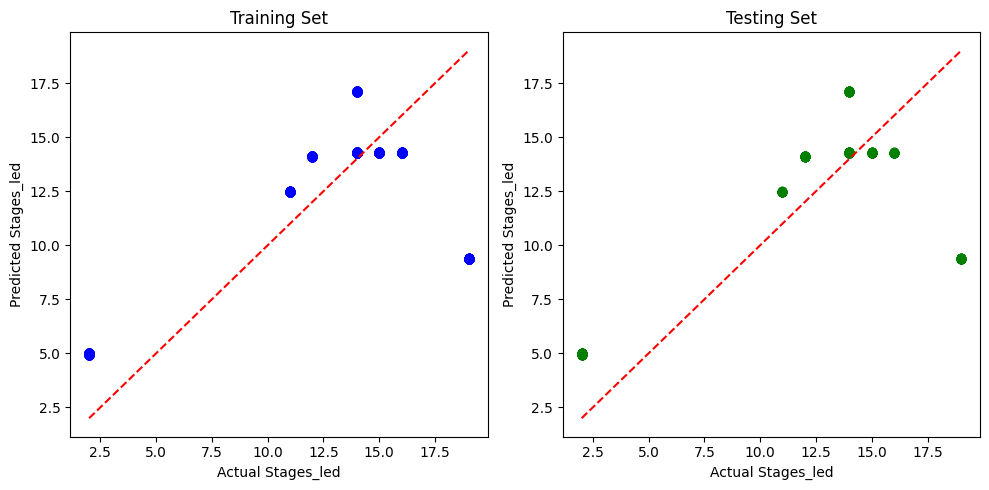

In [ ]:
# Creo el scatter plots of actual vs. predicted 'Stages_led' para el training y el testing sets
plt.figure(figsize=(10, 5))

# Training set scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Stages_led')
plt.ylabel('Predicted Stages_led')
plt.title('Training Set')

# Testing set scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Stages_led')
plt.ylabel('Predicted Stages_led')
plt.title('Testing Set')

plt.tight_layout()
plt.show()

confusion matrix

Metrics on the training set:
Mean Squared Error: 13.480120486777446
Root Mean Squared Error: 3.6715283584329628
Mean Absolute Error: 2.5500976897839043
R-squared: 0.5340380878987581

Metrics on the testing set:
Mean Squared Error: 11.549464238108495
Root Mean Squared Error: 3.398450270065533
Mean Absolute Error: 2.3615668763098454
R-squared: 0.5801048622667595


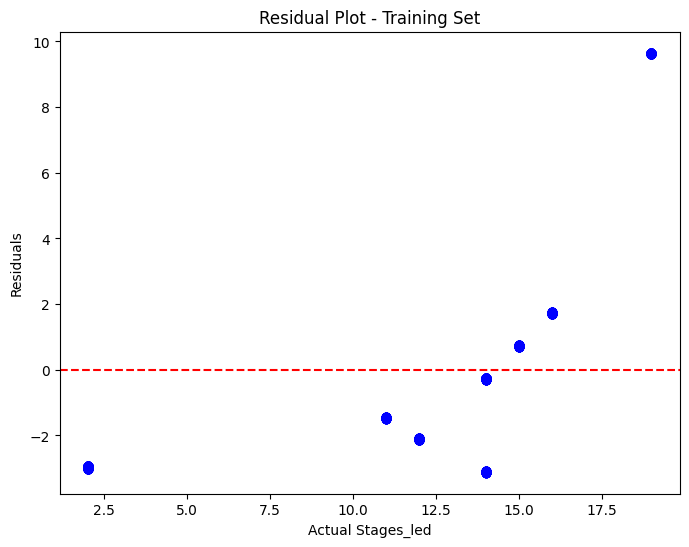

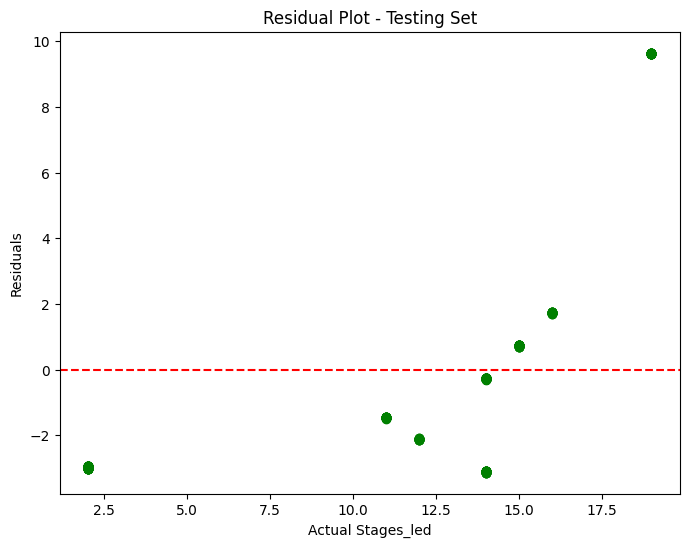

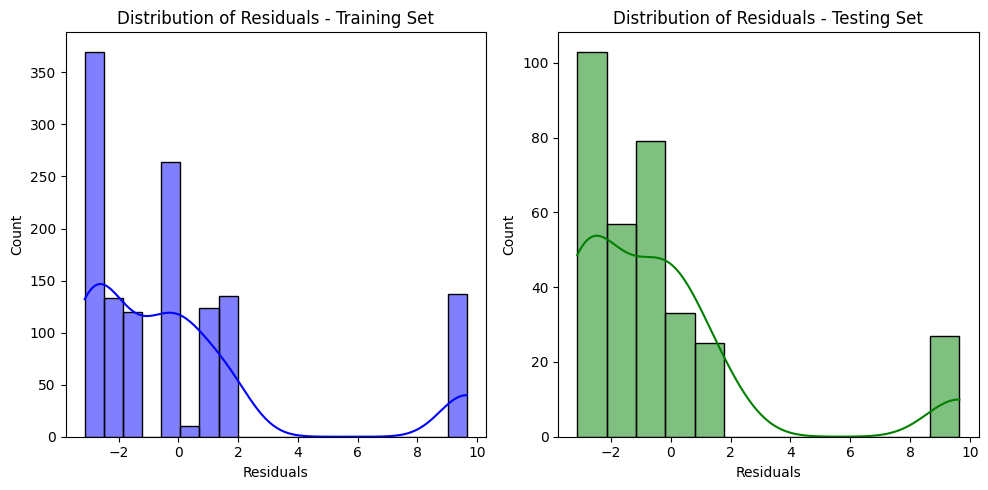

In [ ]:

import seaborn as sns


# Hago predicciones en el training y el testing set
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculo las metricas de evaluacion metrics en el training y testing sets
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Imprimo las metricas de eval
print("Metrics on the training set:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R-squared:", train_r2)

print("\nMetrics on the testing set:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R-squared:", test_r2)

# Residual Plot para el training set
train_residuals = y_train - train_predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Stages_led')
plt.ylabel('Residuals')
plt.title('Residual Plot - Training Set')
plt.show()

# Residual Plot para el testing set
test_residuals = y_test - test_predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Stages_led')
plt.ylabel('Residuals')
plt.title('Residual Plot - Testing Set')
plt.show()

# Distribution Plot de residuals para training y testing sets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals - Training Set')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals - Testing Set')

plt.tight_layout()
plt.show()


El MSE del training set al igual que el del testing set, estan relativamente altos, por los que creo que aun hay una cantidad significativa de variabilidad que el modelo no captura. Concretamente paso de 13.48 a 11.54, por lo que podria mejorar un poco aun.
Los R squared son bajos , tanto el del training set como el del testing set. Por lo que el modelo esxplica solo un porcentaje bajo de la varianza. ( 0.53 y 0.58 respectivamente )

Podria intentar con una tecnica de clustering para ver si puedo agrupar a los ciclistas segun ciertas caracteristicas ( equipo, pais de origen por ejemplo).

Voy a Intentar hacer un Feature selection. Importo todas las librerias nuevamente para poder testear el codigo rapidamente sin tener que ir hasta el principio.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'sql_query' is your DataFrame
# Drop rows with missing values in 'Height', 'Weight', 'Rank', and 'Stages_led' columns
sql_query.dropna(subset=['Height', 'Weight', 'Rank', 'Stages_Led'], inplace=True)

# Split the data into training and testing sets, including the 'Stages_led' column
X = sql_query[['Rank', 'Weight', 'Height']]  # Feature variables (independent variables)
y = sql_query['Stages_Led']                  # Target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SelectKBest to select the top 2 features with the highest F-values (you can adjust 'k' as needed)
selector = SelectKBest(score_func=f_regression, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create the linear regression model and train it using the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the training and testing sets using the selected features
train_predictions = model.predict(X_train_selected)
test_predictions = model.predict(X_test_selected)

# Calculate evaluation metrics on the training and testing sets
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print("Metrics on the training set:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R-squared:", train_r2)

print("\nMetrics on the testing set:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R-squared:", test_r2)


Metrics on the training set:
Mean Squared Error: 13.480307129789473
Root Mean Squared Error: 3.6715537759631784
Mean Absolute Error: 2.550226877096352
R-squared: 0.5340316362847053

Metrics on the testing set:
Mean Squared Error: 11.556347293455163
Root Mean Squared Error: 3.3994627948332017
Mean Absolute Error: 2.3619096320140263
R-squared: 0.5798546202284077


Veo que los R squared no se movieron con el feature selection.

**Clustering **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Rank     Weight    Height  Stages_Led  Team
Cluster                                                   
0        122.530973  69.074336  1.861752   13.800000   565
1         41.201646  62.962963  1.763169    7.596708   243
2        122.318182  63.157025  1.763802    7.900826   242
3         41.118166  69.146384  1.861305   13.708995   567


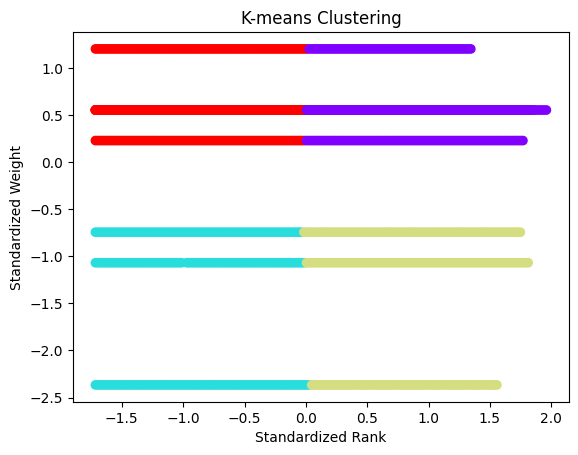

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'sql_query' is your DataFrame
# Drop rows with missing values in 'Height', 'Weight', 'Rank', and 'Stages_led' columns
sql_query.dropna(subset=['Height', 'Weight', 'Rank', 'Stages_Led'], inplace=True)

# Extract the relevant features for clustering (in this case, 'Rank', 'Weight', and 'Height')
X = sql_query[['Rank', 'Weight', 'Height']]

# Standardize the features to have mean=0 and variance=1 (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (you can choose 'k' based on domain knowledge or use elbow method)
num_clusters = 4

# Run K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
sql_query['Cluster'] = cluster_labels

# Explore the clusters and their characteristics
cluster_summary = sql_query.groupby('Cluster').agg({
    'Rank': 'mean',
    'Weight': 'mean',
    'Height': 'mean',
    'Stages_Led': 'mean',
    'Team': 'count'  # Number of riders in each cluster
})

print(cluster_summary)

# Visualize the clusters (you can plot them based on any two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Standardized Rank')
plt.ylabel('Standardized Weight')
plt.title('K-means Clustering')
plt.show()


Tengo 4 grupos de ciclistas.
Los grupos 0 y 3 están formados por ciclistas con mayor ranking, peso y altura. También han competido en más etapas, lo que indica que son corredores experimentados o ciclistas de alto rendimiento.
Los grupos 1 y 2 incluyen corredores de menor ranking, menor peso y menor altura. Han competido en menos etapas.


Grupo 0:

Los ciclistas del cluster 0 tienen un rango medio relativamente alto (122,53) en comparación con otros clusters.
También tienen una media más alta de peso (69,07 kg) y altura (1,86 metros).
En promedio, los corredores del cluster 0 han competido en más etapas y tienen una media más alta de Stages_led (13,80).
El grupo 0 es el más numeroso, con 565 corredores.

Grupo 1:

Los corredores del grupo 1 tienen una clasificación media más baja (41,20) que los del grupo 0. Tienden a tener un peso medio más bajo que los del grupo 0.
Suelen tener un peso medio (62,96 kg) y una altura (1,76 metros) inferiores a los del grupo 0. En promedio, los ciclistas del Grupo 1 han competido en menos etapas, y su promedio de Stages_led es de 7,60.
El grupo 1 es el segundo más grande, con 243 corredores.

Grupo 2:

Los ciclistas del Cluster 2 tienen una clasificación similar a la del Cluster 0, con una clasificación media de 122,32. Tienen un peso medio más bajo (63%). Tienen una media de peso (63,16 kg) y altura (1,76 metros) inferior a la del grupo 0.En promedio, los ciclistas del Grupo 2 han competido en menos etapas, y su promedio de Stages_led es de 7,90.
El grupo 2 es el tercero más grande, con 242 corredores.

Grupo 3:

Los ciclistas del grupo 3 tienen una clasificación similar a la del grupo 1, con una clasificación media de 41,12 puntos.
Suelen tener un peso medio (69,15 kg) y una altura (1,86 metros) superiores a los del grupo 1.
En promedio, los ciclistas del Cluster 3 han competido en más etapas y tienen una media más alta de Stages_led (13,71).
El grupo 3 es el segundo más grande, con 567 corredores.



Como conclusion general, vemos que de los equipos que han terminado o ganado los tour de france desde el 2010 hasta el 2022, hay dos tipos de ciclistas bien diferenciados que componen sus equipos. Aquellos de mas peso, mas altura y mas carreras, y los otros mas livianos, mas bajos y con menos carreras. Seguramente estos ciclistas cumplen funciones diferentes en una carrera dentro de su grupo, y un analisis mas en profundidad de la performance de estos subgrupos seria recomendable para luego trabajar en estrategias de carreras.